In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# (I) Importing Data:

In [4]:
# Define the list of feature names
features = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'attack_type'
]

data = pd.read_csv('kddcup.data_10_percent_corrected', names = features, header=None)

print('The no of data points are:',data.shape[0])
print('='*40)
print('The no of features are:',data.shape[1])
print('='*40)
print('Some of the features are:',features[:10])

The no of data points are: 494021
The no of features are: 42
Some of the features are: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot']


In [5]:
output = data['attack_type'].values
labels = set(output)
print('The different type of output labels are:',labels)
print('='*125)
print('No. of different output labels are:', len(labels))

The different type of output labels are: {'neptune.', 'multihop.', 'pod.', 'back.', 'ftp_write.', 'smurf.', 'guess_passwd.', 'land.', 'phf.', 'nmap.', 'portsweep.', 'perl.', 'ipsweep.', 'buffer_overflow.', 'rootkit.', 'spy.', 'warezclient.', 'normal.', 'loadmodule.', 'teardrop.', 'warezmaster.', 'imap.', 'satan.'}
No. of different output labels are: 23


# (II) Data Cleaning

An important step involved while dealing with datasets is to clean the available data before using it for Data Analysis and building models. Some important steps involved in the data cleaning process are removing/imputing NULL values and removing duplicates from the dataset.

Checking for NULL values:-

In [6]:
print('Null values in dataset are:', data.isnull().sum().sum())

Null values in dataset are: 0


Checking for DUPLICATE values:-

In [7]:
data.drop_duplicates(subset=features, keep='first', inplace = True)

print(data.shape)

data.to_pickle('data.pkl')

(145586, 42)


# (III) Exploratory Data Analysis
Exploratory data analysis (EDA) is an approach for analyzing the dataset to summarize their main characteristics, often with visual methods. A statistical model may or may not be used, but primarily EDA is for seeing what the data can tell us beyond the formal modeling.

Below, we have used some python libraries like matplotlib, pandas, and seaborn for performing EDA. We have also built some utility functions that are used to create plots for Bi-variate Analysis.

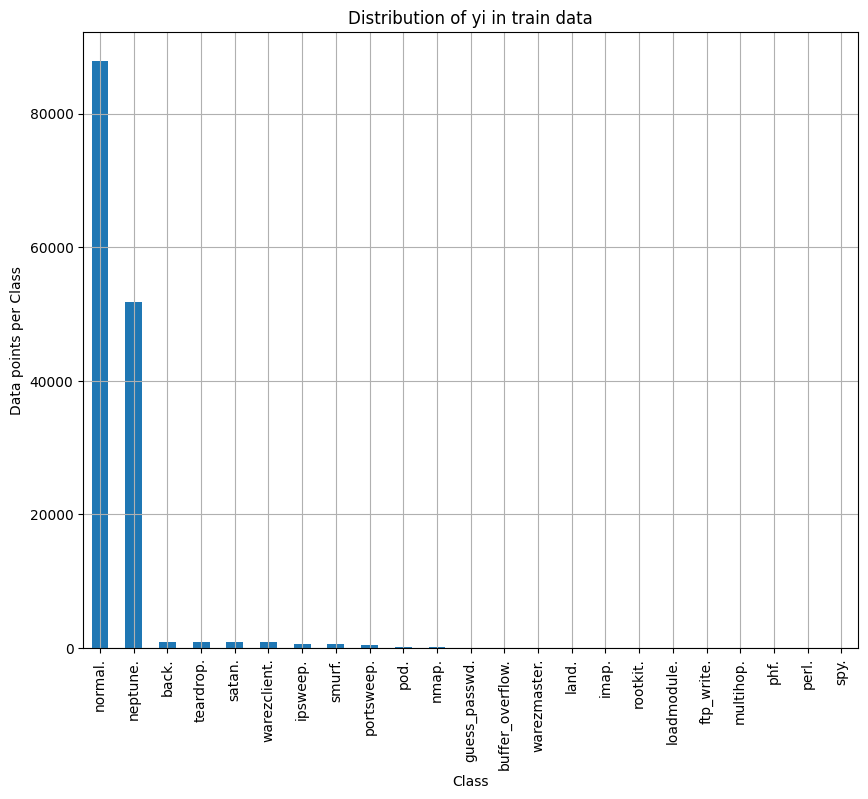

Number of data points in class 1 : 87832 ( 60.33 %)
Number of data points in class 2 : 51820 ( 35.594 %)
Number of data points in class 3 : 968 ( 0.665 %)
Number of data points in class 4 : 918 ( 0.631 %)
Number of data points in class 5 : 906 ( 0.622 %)
Number of data points in class 6 : 893 ( 0.613 %)
Number of data points in class 7 : 651 ( 0.447 %)
Number of data points in class 8 : 641 ( 0.44 %)
Number of data points in class 9 : 416 ( 0.286 %)
Number of data points in class 10 : 206 ( 0.141 %)
Number of data points in class 11 : 158 ( 0.109 %)
Number of data points in class 12 : 53 ( 0.036 %)
Number of data points in class 13 : 30 ( 0.021 %)
Number of data points in class 14 : 20 ( 0.014 %)
Number of data points in class 15 : 19 ( 0.013 %)
Number of data points in class 16 : 12 ( 0.008 %)
Number of data points in class 17 : 10 ( 0.007 %)
Number of data points in class 18 : 9 ( 0.006 %)
Number of data points in class 19 : 8 ( 0.005 %)
Number of data points in class 20 : 7 ( 0.005 

In [8]:
plt.figure(figsize=(10,8))
class_distribution = data['attack_type'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()
# ref: arg sort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1,':', class_distribution.values[i], '(', np.round((class_distribution.values[i]/data.shape[0]*100), 3), '%)')

##Observations:

* Most of the data points are from “normal” (good connections) category which is around 60.33 %.

* In the categories that belong to bad connections, class “neptune.” (35.594 %) and “back.” (0.665 %) have the highest no. of data points.

* Classes “rootkit.”, “load_module.”, “ftp_write.”, “multi-hop.”, “phf.”, “perl.” and “spy.” have the least no. of data points with less than 10 data points per class.

* This dataset is highly imbalanced, thus we will need to build a model which should be able to classify the points belonging to these different classes accurately.

## Performance metrics for the problem:-
We will use the CONFUSION MATRIX as it will help us to determine how well a model has been able to classify the data points belonging to each of the 23 classes.
Along with the confusion matrix, we will also calculate precision, recall and weighted f1-score to determine the best model.

### Another important metric:

For this problem, we want our FPR to be as low as possible. This is because a “Normal” connection getting dropped because of getting misclassified as a “Bad” connection is less severe than a “Bad” connection getting misclassified as a “Normal” connection, which may result in a security threat.

* For this Intrusion Detection problem, the TPR and FPR can be described as below:-

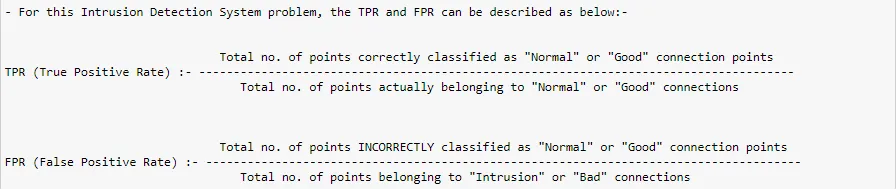

* Thus, while applying different ML techniques to the data, along with calculating the confusion matrix and f1-score, we will also calculate the TPR and FPR scores that will help us to choose the best model.

## Univariate Analysis

1. Duration

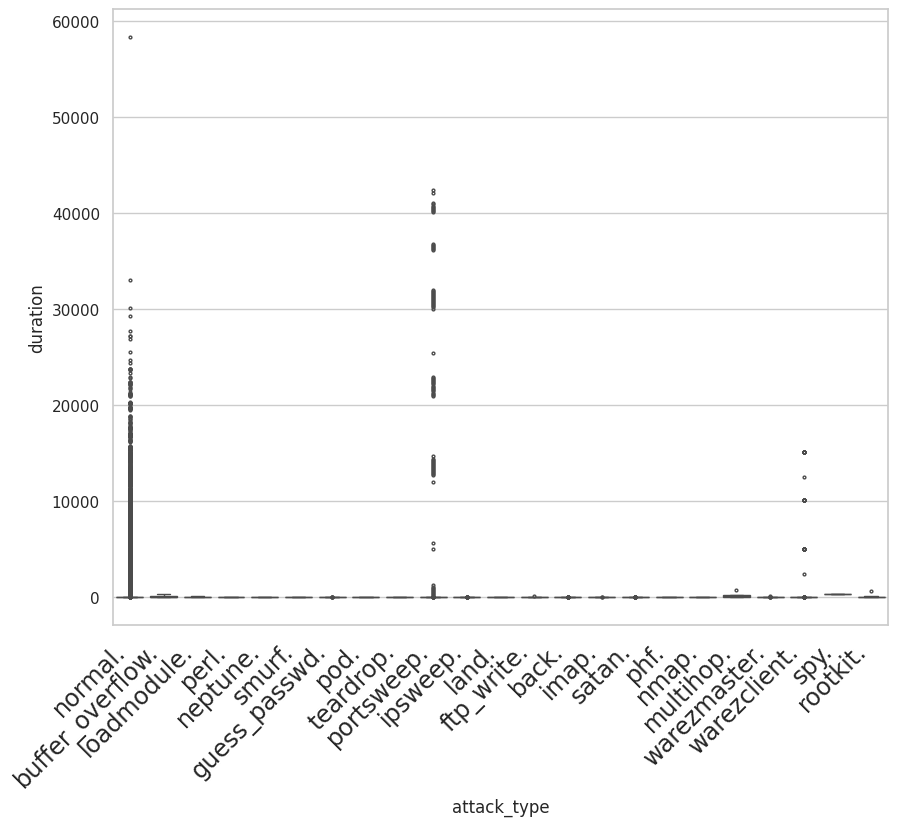

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
ax = sns.boxplot(x="attack_type", y="duration", data=data, fliersize=2)
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
plt.show()

* Due to the high-dimensional nature of this dataset and the potential for intricate relationships among features, this Univariate analysis does not yield fully satisfactory insights into the attack patterns.

* Thus, we will go with pair plots for Bi-variate Analysis or we can also go with PCA/TSNE to reduce the no. of dimensions and perform BiVariate / Tri-Variate Analysis.

## Bivariate Analysis :



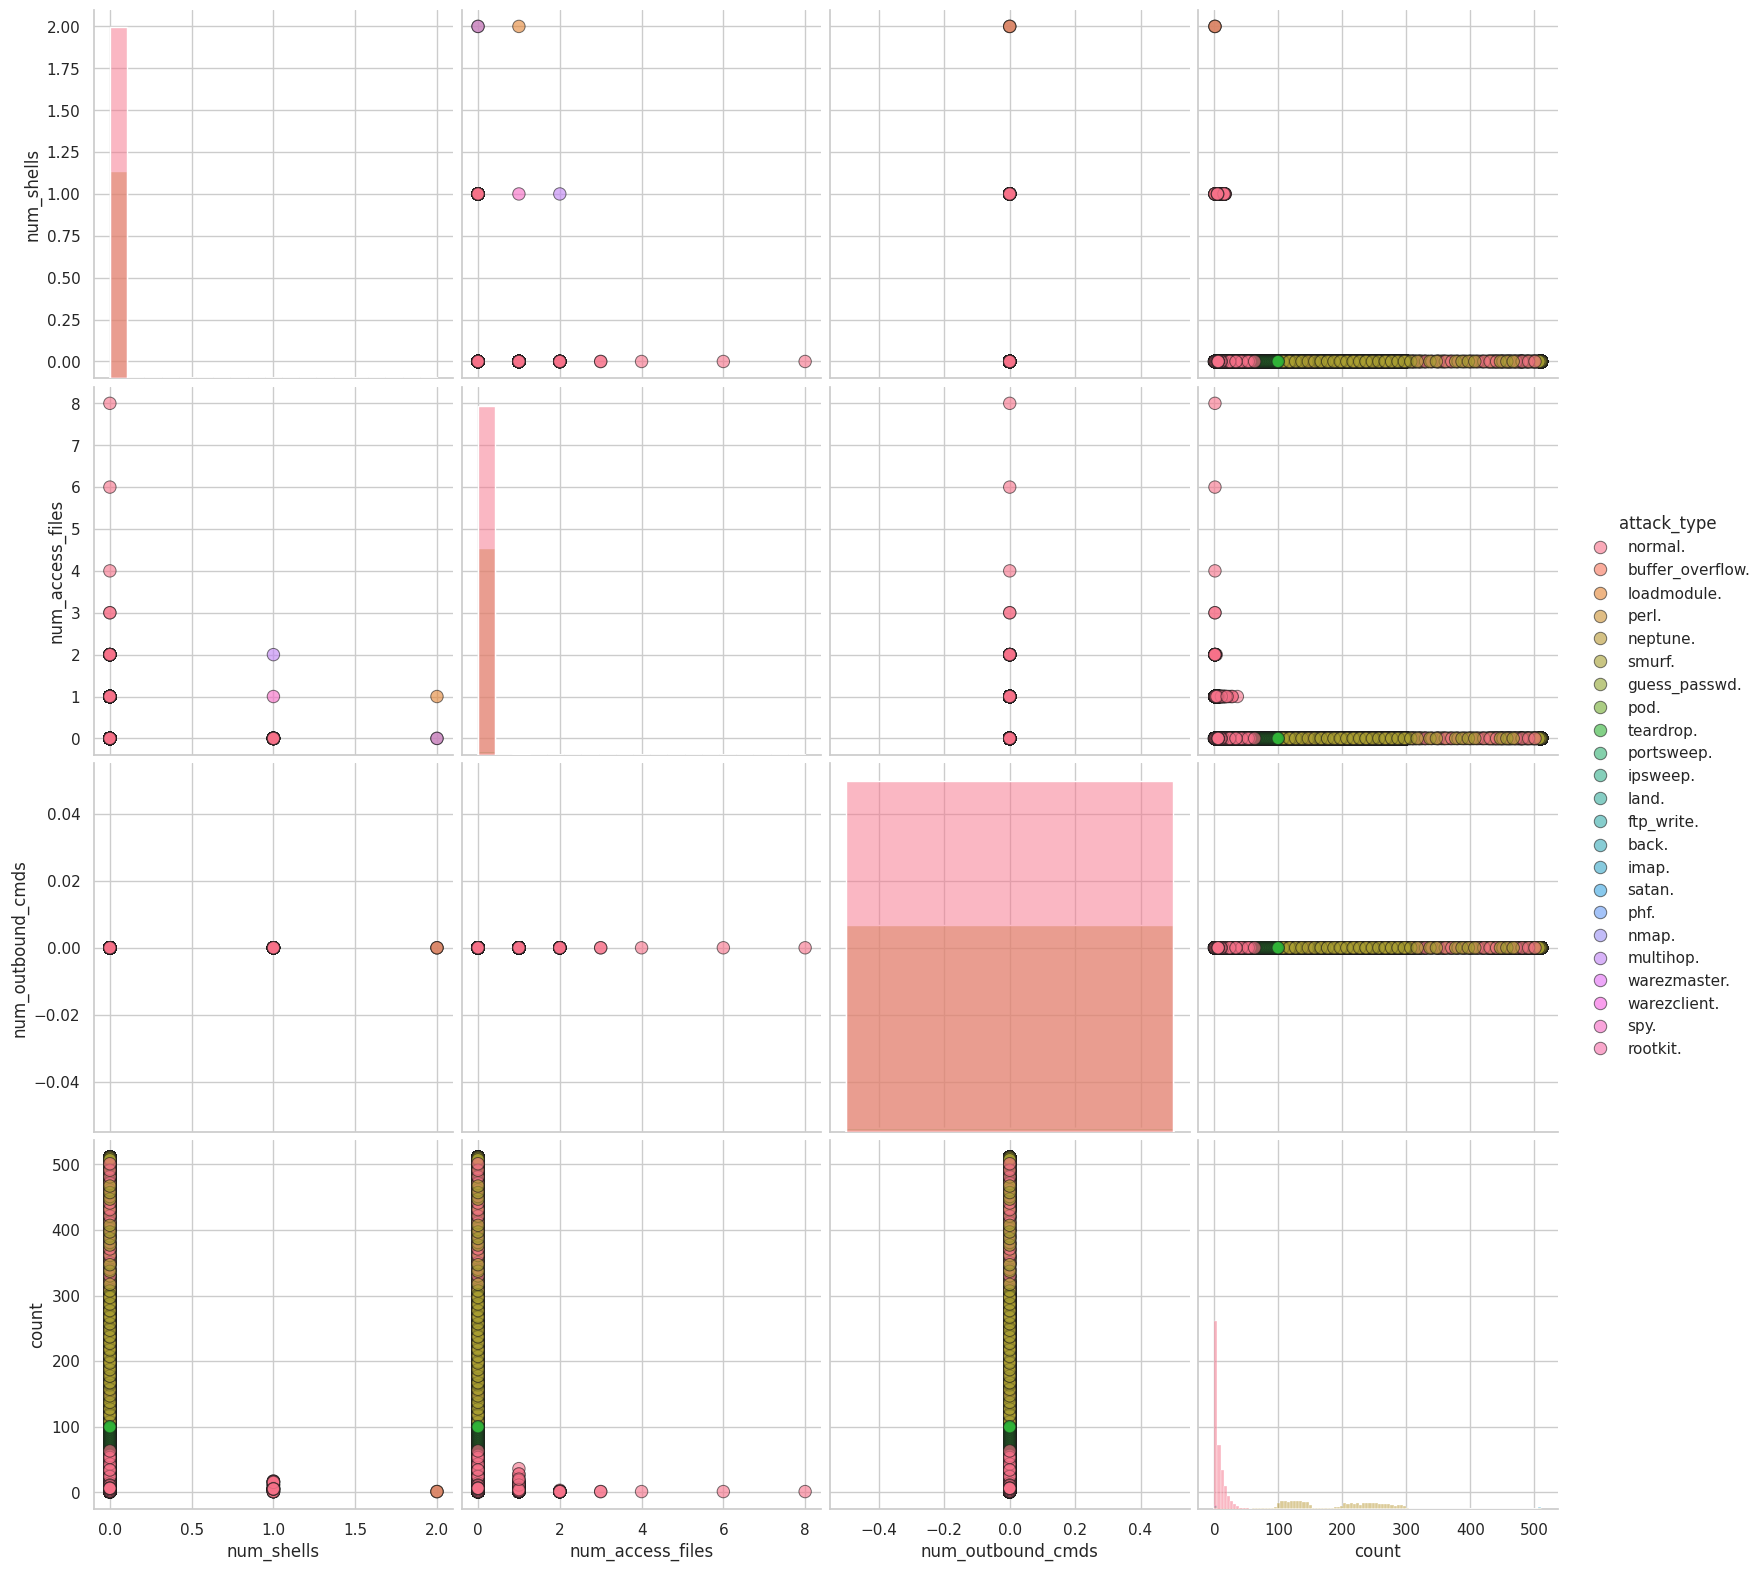

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def pairplot(data, label='attack_type', features=[]):
    '''
    This function creates a pairplot using 4 selected features from the dataset, along with the output label as hue.
    '''
    # Provide default features if none are specified
    if not features:
        features = ['duration', 'src_bytes', 'dst_bytes', 'count']  # Example features; replace with desired ones

    sns.pairplot(
        data, hue=label, height=4, diag_kind='hist',
        vars=features, plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'}
    )
    plt.show()

pairplot(data, label='attack_type', features=['num_shells', 'num_access_files', 'num_outbound_cmds', 'count'])

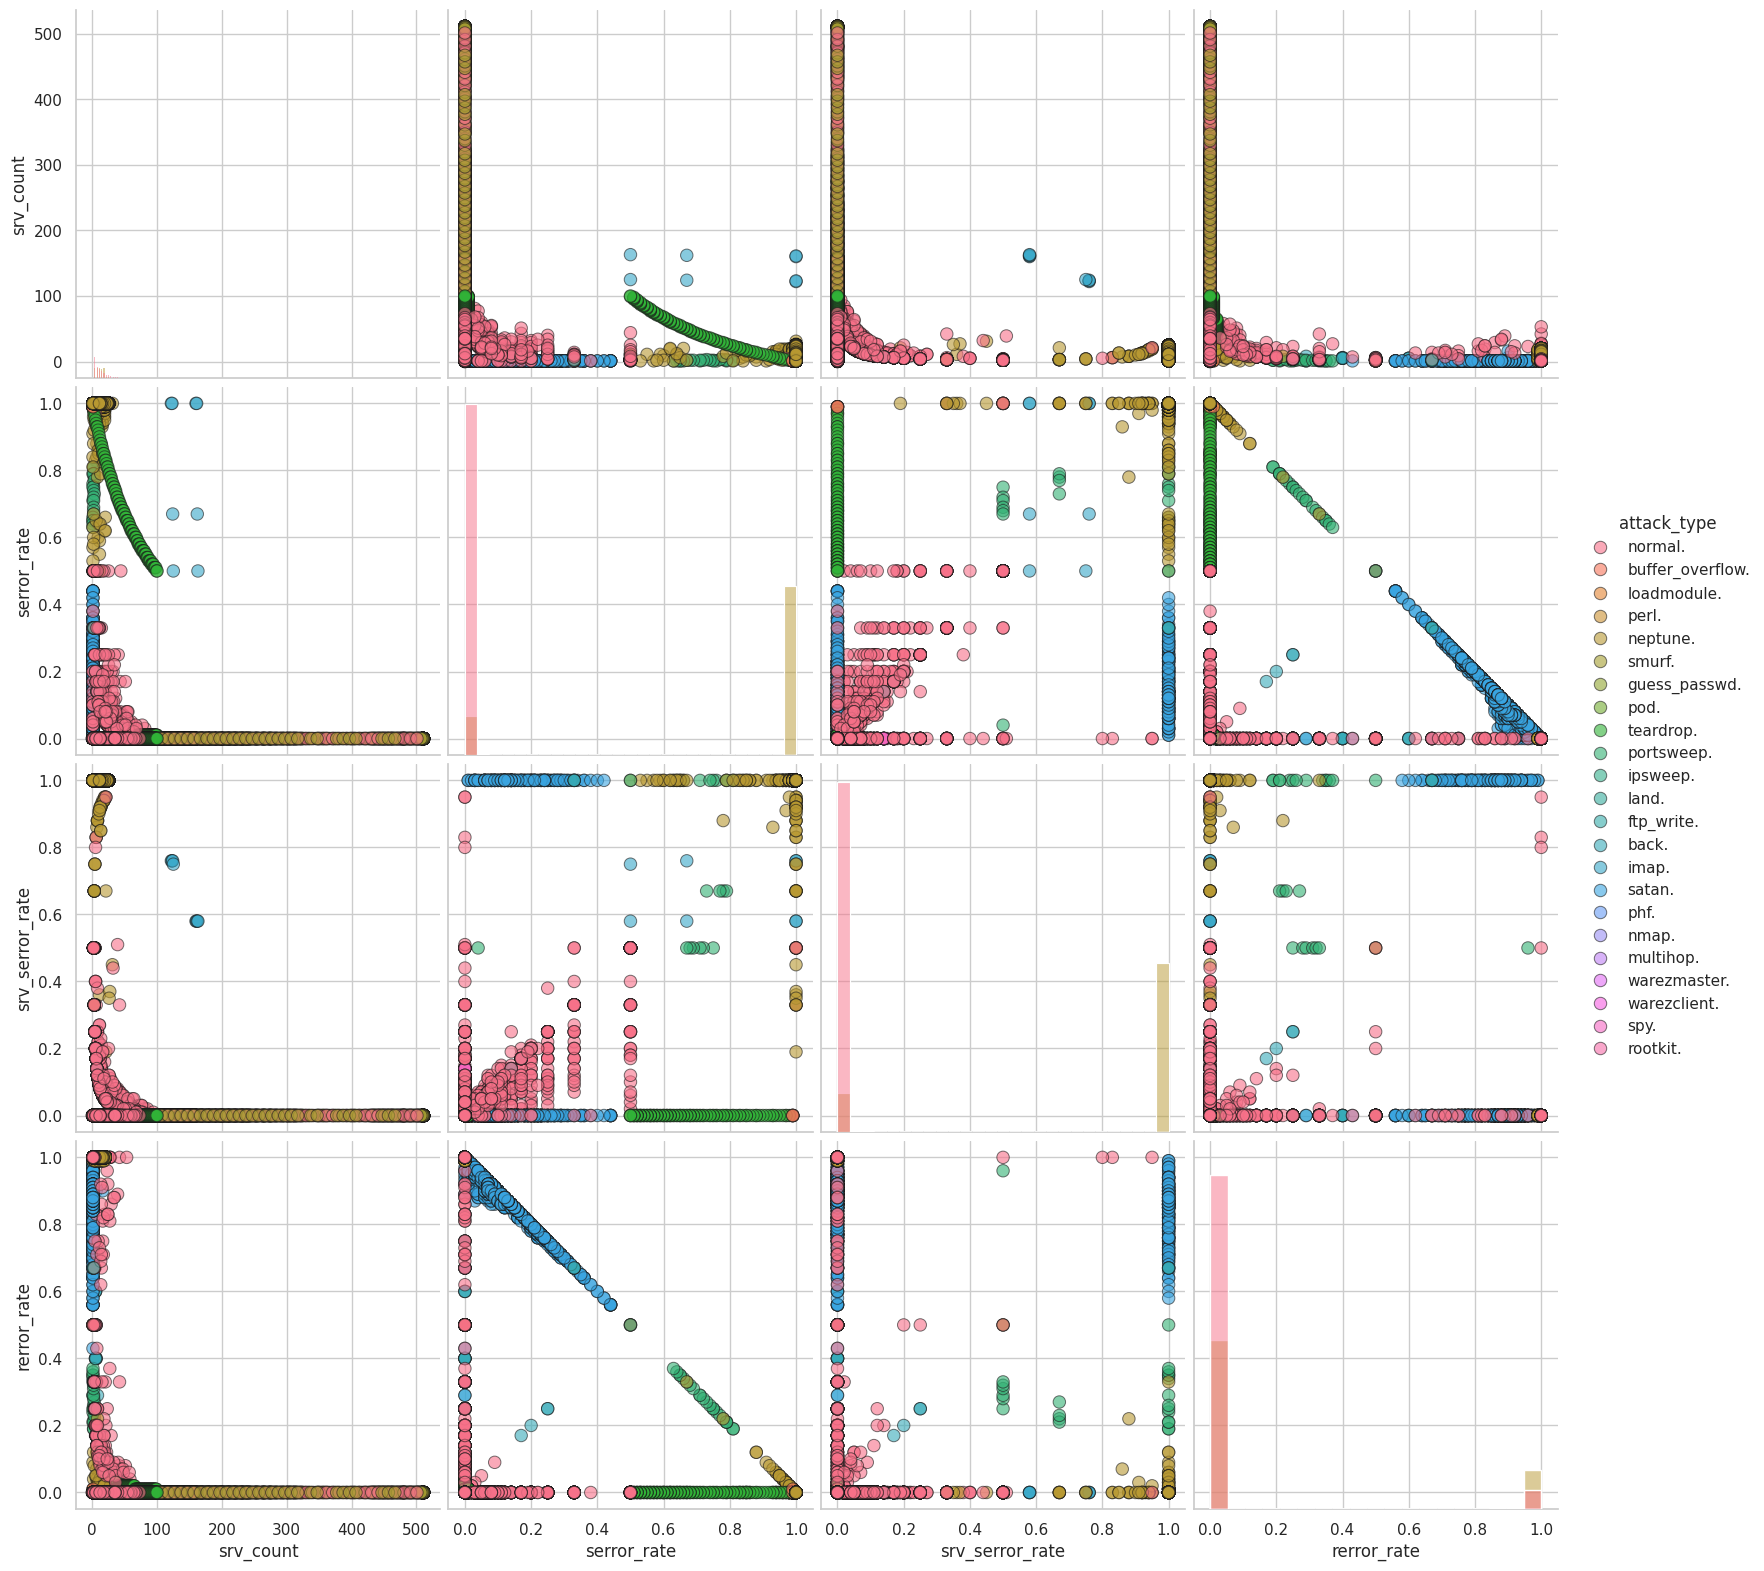

In [11]:
pairplot(data, label='attack_type', features=['srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate'])

## Observation from Pairplots:-

* None of the pair plots are able to show any linear separability/ almost linear separability between the different output categories.

## TSNE for Bivariate Analysis:-
(t-SNE) t-Distributed Stochastic Neighbor Embedding is a non-linear dimensionality reduction algorithm used for exploring high-dimensional data. It maps multi-dimensional data to two or more dimensions suitable for human observation.

Below we have written a function that can be used to plot the TSNE plots by specifying the values for perplexity and no. of iterations as per our choice.

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Function to apply t-SNE
def tsne_func(data, label, no_components=2, perplexity_value=30, n_iter_value=1000):
    '''
    This function applies TSNE on the original dataset with no_components, perplexity_value, and n_iter_value as the TSNE parameters.
    It transforms the original dataset into TSNE transformed feature space with the number of features equal to no_components.
    It then plots a scatter plot of the transformed data points, color-coded by their class label.
    '''
    print('TSNE with perplexity={} and no. of iterations={}'.format(perplexity_value, n_iter_value))

    # Apply label encoding to categorical variables in the dataset
    le = LabelEncoder()
    data_encoded = data.apply(le.fit_transform)

    # Apply TSNE
    tsne = TSNE(n_components=no_components, perplexity=perplexity_value, n_iter=n_iter_value)
    tsne_transformed = tsne.fit_transform(data_encoded)
    print("Shape of TSNE transformed data:", tsne_transformed.shape)

    # Combine transformed features with labels
    tsne_df = pd.DataFrame(tsne_transformed, columns=[f'feature{i+1}' for i in range(no_components)])
    tsne_df['Output'] = label

    # Plotting
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=tsne_df, x='feature1', y='feature2', hue='Output', palette='viridis', s=60, edgecolor='k', alpha=0.7)
    plt.title('t-SNE Projection')
    plt.legend(loc='best')
    plt.show()

# Example usage:
# Assuming your dataset is loaded in `data` and `attack_type` is the label column

# Separate features (X) and labels (Y)
X = data.drop(columns=['attack_type'])  # Drop the target column to get features
Y = data['attack_type']  # Target variable (labels)

TSNE plot(2D) with perplexity_value=100, n_iter_value=500:
TSNE with perplexity=100 and no. of iterations=500


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Shape of TSNE transformed data: (145586, 2)


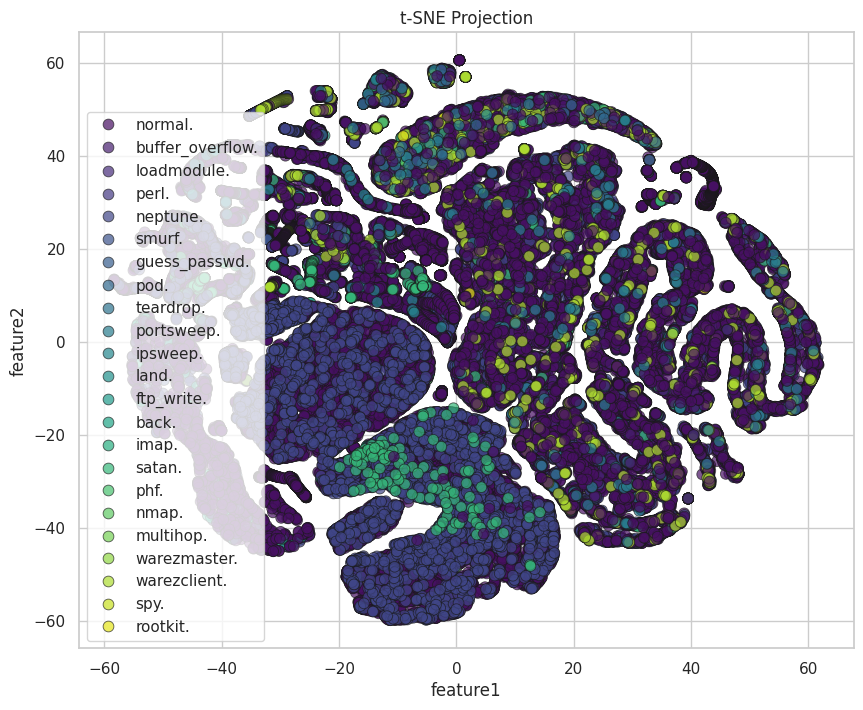

In [17]:
# First call for t-SNE with perplexity=100 and n_iter=500
print("TSNE plot(2D) with perplexity_value=100, n_iter_value=500:")
tsne_func(X, Y, no_components=2, perplexity_value=100, n_iter_value=500)

TSNE plot(2D) with perplexity_value=50, n_iter_value=1000:
TSNE with perplexity=50 and no. of iterations=1000


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Shape of TSNE transformed data: (145586, 2)


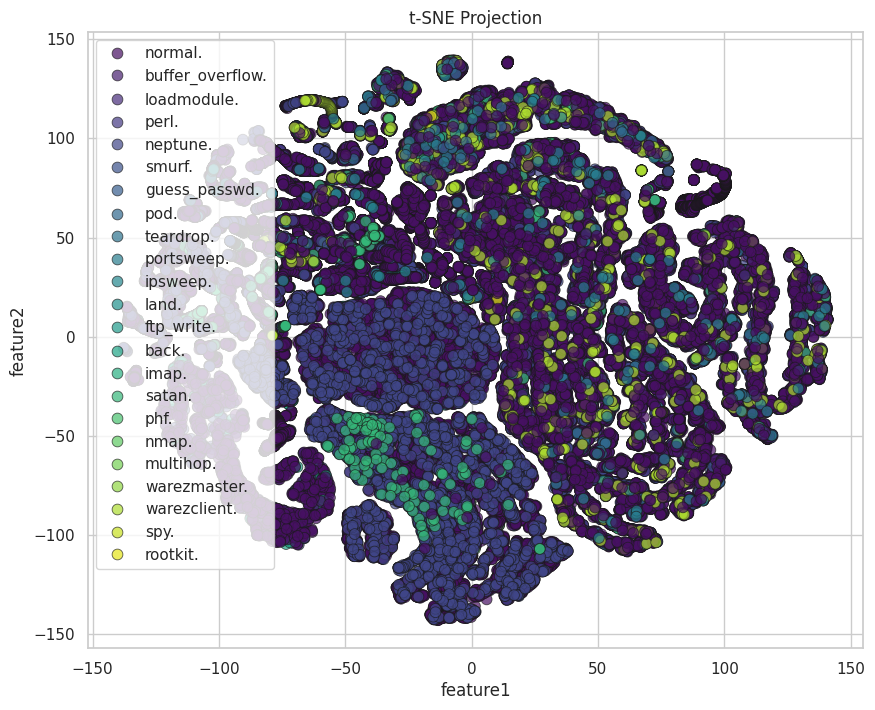

In [18]:
print("TSNE plot(2D) with perplexity_value=50, n_iter_value=1000:")
tsne_func(X, Y, no_components=2, perplexity_value=50, n_iter_value=1000)

## Observations:
From the above 2 plots, we can conclude that there is no linear separability between any 2 or more categories in the TSNE transformed 2-D space.